**Face Mask Detection using a Convolutional Neural Network**

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:09<00:00, 20.5MB/s]
100% 163M/163M [00:09<00:00, 17.9MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
# dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

In [ ]:
with_mask_files = sorted(os.listdir('/content/data/with_mask'))
print(with_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [ ]:
without_mask_files = sorted(os.listdir('/content/data/without_mask'))
print(without_mask_files[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [ ]:
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


No data imbalance

**Creating Labels for the 2 classes**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

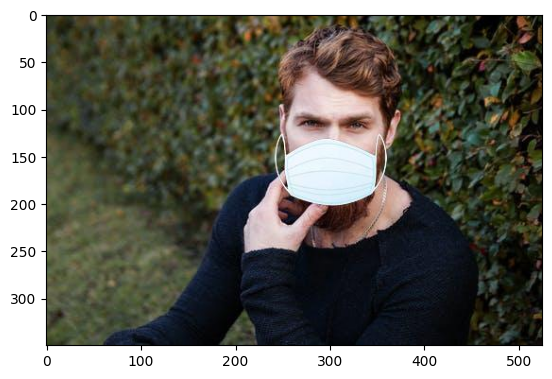

In [ ]:
# displaying with_mask images
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

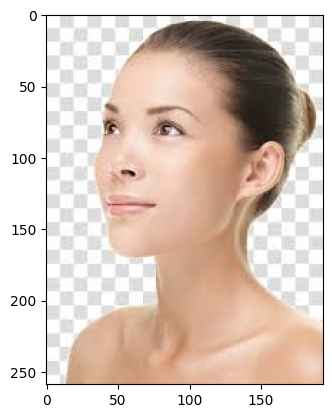

In [ ]:
# displaying without_mask images
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Images are not the same sizes, we have to change that

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy array
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

with_mask_files = sorted(os.listdir(with_mask_path))
without_mask_files = sorted(os.listdir(without_mask_path))

data = []

# Load images with masks
for img_file in with_mask_files: # img_file will take the file name and concat with the path
    image = Image.open(os.path.join(with_mask_path, img_file))
    image = image.resize((128, 128)) #
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Load images without masks
for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))
    image = image.resize((128, 128)) #(224, 224)
    image = image.convert('RGB') # convert all images to RGB
    image = np.array(image) # convert images to  numpy array
    data.append(image) # append to the data list above

    # convert images to numpy array

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [ ]:
type(data[6])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)
print(Y_test[0:15])

(7553,) (6042,) (1511,)
[0 0 1 1 1 0 0 1 1 1 0 0 1 1 1]


In [ ]:
# scaling the data

X_train_scaled = X_train / 255

X_test_scaled = X_test / 255

In [ ]:
print(X_train_scaled[10])

[[[0.35294118 0.29019608 0.23137255]
  [0.32941176 0.26666667 0.20784314]
  [0.30588235 0.24313725 0.18431373]
  ...
  [0.66666667 0.60392157 0.50196078]
  [0.64705882 0.58431373 0.48235294]
  [0.60784314 0.54509804 0.44313725]]

 [[0.30196078 0.23921569 0.18039216]
  [0.30196078 0.23921569 0.18039216]
  [0.29411765 0.23137255 0.17254902]
  ...
  [0.69803922 0.63529412 0.53333333]
  [0.66666667 0.60392157 0.50196078]
  [0.63137255 0.56862745 0.46666667]]

 [[0.27843137 0.22745098 0.16470588]
  [0.27843137 0.22745098 0.16470588]
  [0.2745098  0.21960784 0.15686275]
  ...
  [0.69019608 0.62745098 0.5254902 ]
  [0.72941176 0.66666667 0.56470588]
  [0.74117647 0.67843137 0.57647059]]

 ...

 [[0.99215686 0.96470588 0.90196078]
  [0.99215686 0.96470588 0.90196078]
  [0.99215686 0.96470588 0.90196078]
  ...
  [0.8745098  0.76862745 0.6       ]
  [0.87058824 0.76470588 0.59607843]
  [0.8745098  0.76862745 0.6       ]]

 [[0.99215686 0.96470588 0.90196078]
  [0.99215686 0.96470588 0.90196078]


**Building the Convolution Neural Networks (CNN)**

In [ ]:
num_of_class = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) # 32 filters, each of size 3 by 3
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # 2 by 2 max pooling

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')) # 32 filters of size 3 by 3
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # max pooling 2 by 2

# NN
model.add(keras.layers.Flatten()) # when in middle layer do not need to specify shape because NN can figure it out automitically

model.add(keras.layers.Dense(128, activation='relu')) # 124 neurons in first layer
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu')) # 64 neurons in second layer
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class, activation='sigmoid')) # softmax -> when you have more than 2 classes to predict


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=7)
# 10% of training will be for validation(val_loss, val_acc)

Epoch 1/7
170/170 [==============================] - 10s 24ms/step - loss: 0.4450 - accuracy: 0.8039 - val_loss: 0.2590 - val_accuracy: 0.8843
Epoch 2/7
170/170 [==============================] - 3s 20ms/step - loss: 0.2966 - accuracy: 0.8860 - val_loss: 0.2279 - val_accuracy: 0.8959
Epoch 3/7
170/170 [==============================] - 3s 18ms/step - loss: 0.2372 - accuracy: 0.9034 - val_loss: 0.2005 - val_accuracy: 0.9289
Epoch 4/7
170/170 [==============================] - 3s 18ms/step - loss: 0.2339 - accuracy: 0.9163 - val_loss: 0.2451 - val_accuracy: 0.9190
Epoch 5/7
170/170 [==============================] - 3s 19ms/step - loss: 0.1682 - accuracy: 0.9376 - val_loss: 0.1897 - val_accuracy: 0.9322
Epoch 6/7
170/170 [==============================] - 4s 24ms/step - loss: 0.1434 - accuracy: 0.9465 - val_loss: 0.1865 - val_accuracy: 0.9240
Epoch 7/7
170/170 [==============================] - 3s 18ms/step - loss: 0.1190 - accuracy: 0.9577 - val_loss: 0.1927 - val_accuracy: 0.9372


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1651 - accuracy: 0.9411
Test Accuracy =  0.9410986304283142


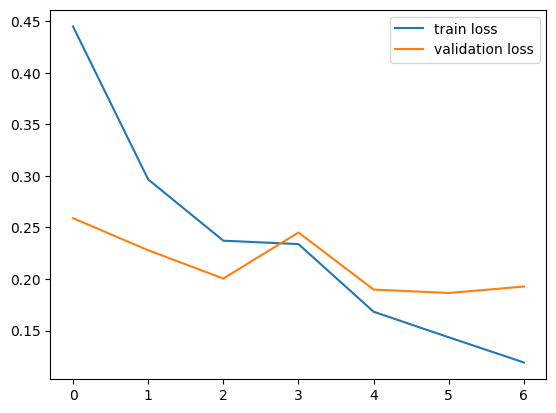

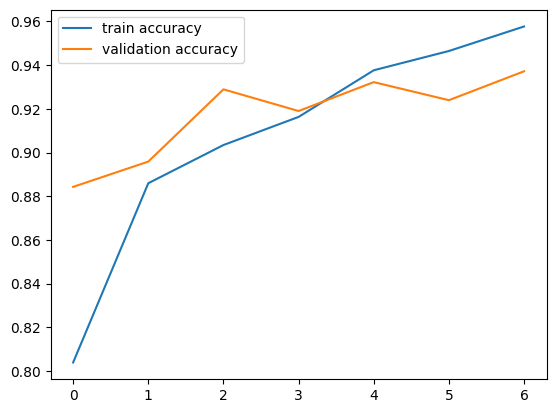

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test7.jpg


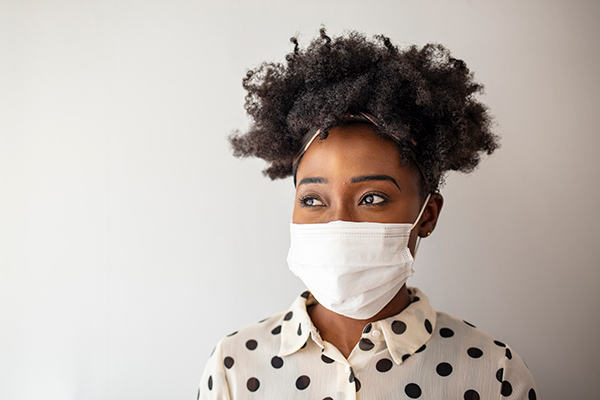

1/1 [==============================] - 0s 21ms/step
[[0.40156025 0.77889407]]
1
The person in the image is wearing a mask


In [53]:
input_image = input('Path of the image to be predicted: ')

show_image = cv2.imread(input_image)

cv2_imshow(show_image)

img = Image.open(input_image)
img = img.resize((128, 128))
img = img.convert('RGB')
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

input_prediction = model.predict(img_array)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Downloading Model

In [ ]:
import pickle

In [ ]:
filename = 'face_mask_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loading_model = pickle.load(open('face_mask_model.sav', 'rb'))